# **Importación Datos**

Text(0, 0.5, 'temperatura')

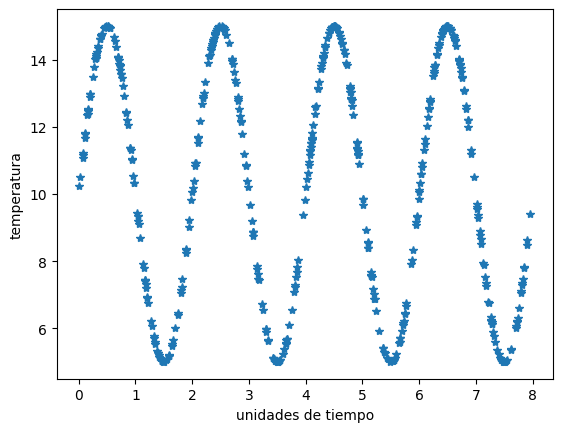

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

num_sample = 500
x = np.random.RandomState(10).uniform(low=0, high=8, size=num_sample).astype(np.float32)
# Shuffle the values to ensure they are not in order
np.random.shuffle(x)
y = 5*np.sin(math.pi*x).astype(np.float32) + 10
plt.plot(x, y, '*')
plt.xlabel('unidades de tiempo')
plt.ylabel('temperatura')

Text(0, 0.5, 'temperatura')

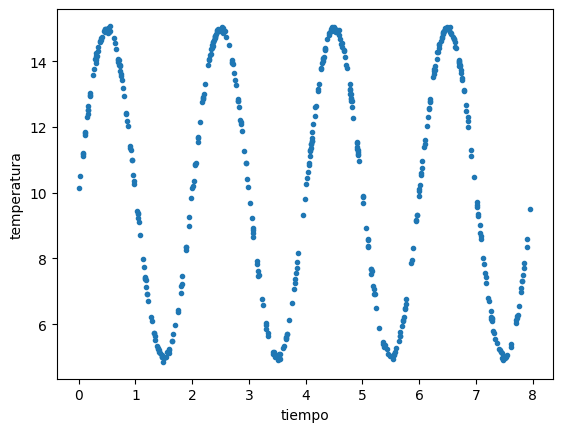

In [ ]:
y = y + 0.05 * np.random.RandomState(10).randn(*y.shape)
plt.plot(x, y, '.')
plt.xlabel('tiempo')
plt.ylabel('temperatura')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=10)
print(x_train)

[1.1741505  3.4359374  3.0729747  2.8302765  4.4299874  3.4694374
 1.5845029  6.5697317  4.380689   0.69702685 4.2764635  4.7914915
 5.7663994  2.8838825  0.9800798  5.0091496  0.27122012 0.117079
 0.01407719 6.96804    0.72085387 4.7147818  3.516842   1.476574
 4.9176135  2.702527   0.9338361  1.0517728  3.0211353  1.0366142
 4.30518    6.3544726  2.8597057  0.747683   7.1782393  7.0714917
 0.3339025  3.9603891  6.2789335  4.6426506  0.39356127 6.3135104
 4.055829   1.6634167  2.4728413  7.823194   0.51400846 7.5540857
 5.7458973  0.30634722 4.1763964  6.7550864  7.2603436  4.6250916
 6.441786   4.554171   3.0729156  2.025433   4.5339994  1.6380929
 5.245814   4.104982   4.8083115  2.5691361  5.8623624  3.9880562
 2.1983612  2.7707772  4.4052863  0.83695793 5.726647   5.958913
 5.020495   3.488946   0.7355943  2.5461824  7.0777497  4.217175
 5.4828787  7.9620705  7.8546786  5.430683   6.0965343  0.03158613
 0.46359846 6.7219787  7.222654   6.248485   0.7236748  1.3296171
 7.342193   3

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(1,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

print(model.summary())
model.compile(optimizer='adam', loss='mean_squared_error')
print(x_train)
print(y_train)
print(x_test)
print(y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12609 (49.25 KB)
Trainable params: 12609 (

In [ ]:
history = model.fit(x_train, y_train, epochs=1000, batch_size=50, validation_data=(x_test, y_test))

Epoch 1/1000
8/8 [==============================] - 1s 16ms/step - loss: 115.4688 - val_loss: 105.9308
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 94.5864 - val_loss: 81.2777
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 66.9429 - val_loss: 50.7192
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 45.4027 - val_loss: 47.6179
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 43.6878 - val_loss: 43.3102
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 40.2333 - val_loss: 41.2234
Epoch 7/1000
8/8 [==============================] - 0s 4ms/step - loss: 39.3326 - val_loss: 39.9378
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 37.6816 - val_loss: 39.1849
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 36.5854 - val_loss: 37.2855
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 35.0534 - val_loss: 35.4

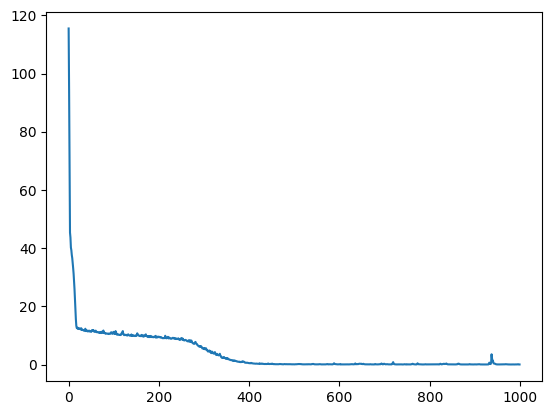

In [ ]:
# Plot the loss
plt.plot(history.history['loss'], label='loss')

4/4 [==============================] - 0s 2ms/step


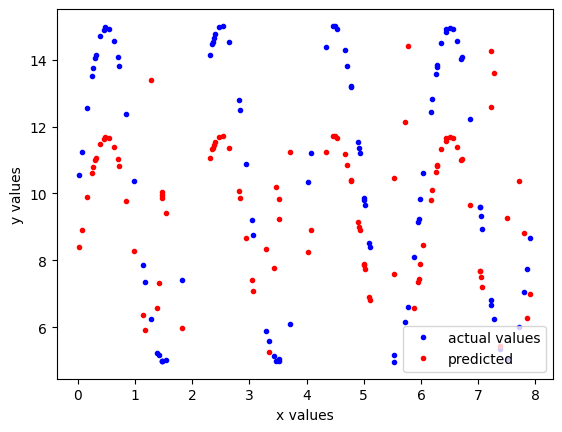

In [ ]:
test_loss = model.evaluate(x_test, y_test)
y_test_pred = model.predict(y_test)
plt.clf()
plt.plot(x_test, y_test, 'b.', label='actual values')
plt.plot(x_test, y_test_pred, 'r.', label='predicted')
plt.legend()
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [ ]:
temperatura_actual = float(input("Ingrese la temperatura actual: "))

temperatura_futura =model.predict([[temperatura_actual]])[0][0]

print("La temperatura futura estimada es:", temperatura_futura)

Ingrese la temperatura actual: 15
1/1 [==============================] - 0s 40ms/step
La temperatura futura estimada es: 11.713938


In [ ]:
# Instalar xxd
!apt-get update && apt-get -qq install xxd
# Convertir el modelo a un archivo C
!xxd -i tflite_models/model.tflite > model.cc

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [518 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,000 kB]
Hit:9 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,264 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,037 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,156 

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
model_no_quant_tflite = converter.convert()
import pathlib
tflite_models_dir = pathlib.Path('/content/tensor_flow_model')
tflite_models_dir.mkdir(exist_ok=True, parents=True)
tflite_model_file = tflite_models_dir/'modelo_bueno.tflite'
tflite_model_file.write_bytes(model_no_quant_tflite)

51884

[7.5806074]
[13.959535]
[14.611364]
[6.052679]
[11.141069]
[8.014746]
[5.6156616]
[5.1737103]
[11.312485]
[11.335966]
[11.169974]
[6.0133915]
[6.4052095]
[5.5129223]
[6.3185725]
[11.012298]
[6.0729194]
[12.961274]
[14.970643]
[14.647465]
[14.598997]
[10.625658]
[12.429122]
[15.019938]
[7.127659]
[14.959334]
[5.489523]
[12.732086]
[15.007309]
[15.097565]
[10.955662]
[6.328645]
[12.692506]
[12.586914]
[14.345765]
[6.083163]
[7.490911]
[12.115725]
[5.990599]
[5.917931]
[6.342841]
[5.6504545]
[14.462362]
[11.073376]
[10.215941]
[5.9762316]
[5.0773726]
[11.516465]
[15.21271]
[14.263993]
[15.447786]
[14.107813]
[13.322865]
[10.132136]
[9.522687]
[14.978171]
[9.434482]
[5.528032]
[11.271677]
[10.694219]
[13.936693]
[11.139107]
[14.040897]
[10.05917]
[14.429357]
[6.010477]
[10.88205]
[14.179315]
[14.070556]
[14.973307]
[14.316926]
[6.0372424]
[11.860635]
[5.3791375]
[4.9187913]
[6.279014]
[5.081784]
[6.02588]
[5.6844187]
[12.664145]
[5.385048]
[12.20301]
[5.0938387]
[7.4073515]
[14.430249]
[12

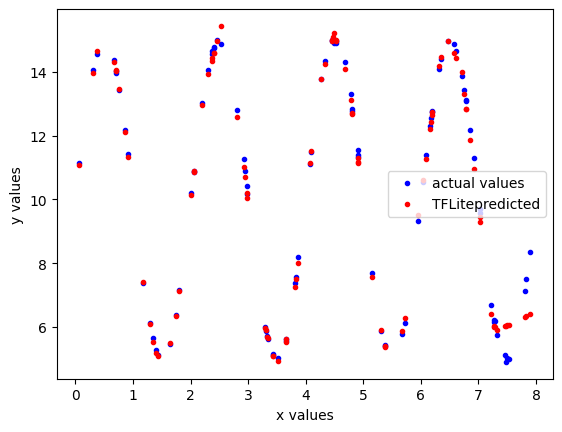

In [ ]:
x_test = x_test.reshape((x_test.size, 1))
tflite_model_file = '/content/model_good.tflite'
# Initialize the TFLite interpreter
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']
prediction_list = []
x_test = x_test.reshape((x_test.size, 1))
x_test = x_test.astype(np.float32)
for i in range (len(x_test)):
  interpreter.set_tensor(input_index, [x_test[i]])
  interpreter.invoke()
  prediction = interpreter.get_tensor(output_index)[0]
  print(prediction)
  prediction_list.append(prediction)
plt.clf()
plt.plot(x_test, y_test, 'b.', label='actual values')
plt.plot(x_test, np.array(prediction_list), 'r.', label='TFLitepredicted')
plt.legend()

plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

Comprobación del funcionamiento del modelo con datos ingresados manualmente

In [ ]:
import numpy as np
import tensorflow as tf

# Carga el modelo TensorFlow Lite
modelo_path = '/content/model_good.tflite'
interpreter = tf.lite.Interpreter(model_path=modelo_path)
interpreter.allocate_tensors()

# Obtén los índices de entrada y salida del modelo
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Verifica las dimensiones de entrada y salida
input_shape = input_details[0]['shape']
output_shape = output_details[0]['shape']

# Pide al usuario que ingrese los datos de entrada
temperatura_actual = float(input("Ingrese la temperatura actual: "))

# Prepara los datos de entrada (asegúrate de que coincidan con las dimensiones esperadas)
input_data = np.array([[temperatura_actual]], dtype=np.float32)

# Realiza la inferencia
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

# Obtiene los resultados de la inferencia
output_data = interpreter.get_tensor(output_details[0]['index'])

# Procesa la salida (puede variar según tu modelo)
prediction = output_data[0]

# Imprime la predicción
print("La temperatura futura estimada es:", prediction)


Ingrese la temperatura actual: 23.5
La temperatura futura estimada es: [18.050049]
